# Preparation

In [2]:
import pandas as pd
import numpy as np
from pathlib import Path
import os, sys, re
%cd ..
from experiment import analyze
import matplotlib.pyplot as plt

/Users/steindijkstra/Documents/Thesis/python_code


In [3]:
path = Path('/Users/steindijkstra/Documents/Thesis/python_code')

# hotel seq table

In [4]:
data_eth, testdata_eth, result_evidential_eth, result_evidential_new_eth, result_dropout_eth, result_ensemble_eth = analyze.load_data(path/"results/Experiment_13_pedestrian_eth_seq/")

In [4]:
table_acc_eth, table_unc_eth = analyze.create_tables(testdata_eth, result_evidential_eth, result_evidential_new_eth, result_dropout_eth, result_ensemble_eth)

In [5]:
np.set_printoptions(precision=3)
table_acc_eth.round(3)
# Find computation time manual in files during the right experiment

,ADE,min,max,FDE,min,max
Evidential Network,0.522,0.057,1.841,0.971,0.021,4.399
Adapted Evidential Network,0.628,0.068,1.987,1.120,0.013,4.688
MC Dropout,0.673,0.103,3.197,1.111,0.021,4.682
Deep Ensemble,0.566,0.097,2.555,1.012,0.017,4.648


In [6]:
table_unc_eth

,CSI(p=0.5),"CSI(p=0.5,t=1)","CSI(p=0.5,t=12)",CSI(p=0.95),"CSI(p=0.95,t=1)","CSI(p=0.95,t=12)",CSI(p>0.95),"CSI(p>0.95,t=1)","CSI(p>0.95,t=12)"
Evidential Network,0.567598,0.752795,0.486957,0.956625,0.997516,0.884472,0.999586,1.0,0.996273
Adapted Evidential Network,0.277950,0.361491,0.275776,0.859627,0.954037,0.826087,0.998654,1.0,0.992547
MC Dropout,0.463354,0.880745,0.224845,0.889234,1.000000,0.695652,0.989648,1.0,0.975155
Deep Ensemble,0.435611,0.839752,0.185093,0.853934,0.990062,0.678261,0.993478,1.0,0.970186


# Load all data

In [7]:
data_hotel, testdata_hotel, result_evidential_hotel, result_evidential_new_hotel, result_dropout_hotel, result_ensemble_hotel = analyze.load_data(path/"results/Experiment_14_pedestrian_hotel_seq/")
data_zara01, testdata_zara01, result_evidential_zara01, result_evidential_new_zara01, result_dropout_zara01, result_ensemble_zara01 = analyze.load_data(path/"results/Experiment_15_pedestrian_zara01/")
data_zara02, testdata_zara02, result_evidential_zara02, result_evidential_new_zara02, result_dropout_zara02, result_ensemble_zara02 = analyze.load_data(path/"results/Experiment_16_pedestrian_zara02/")


In [8]:
table_acc_hotel, table_unc_hotel = analyze.create_tables(testdata_hotel, result_evidential_hotel, result_evidential_new_hotel, result_dropout_hotel, result_ensemble_hotel)
table_acc_zara01, table_unc_zara01 = analyze.create_tables(testdata_zara01, result_evidential_zara01, result_evidential_new_zara01, result_dropout_zara01, result_ensemble_zara01)
table_acc_zara02, table_unc_zara02 = analyze.create_tables(testdata_zara02, result_evidential_zara02, result_evidential_new_zara02, result_dropout_zara02, result_ensemble_zara02)

# ADE & FDE table

In [9]:
pd.concat([table_acc_eth,table_acc_hotel,table_acc_zara01, table_acc_zara02], axis=1).drop(["min","max"],axis=1).round(3).iloc[:,0:20]


,ADE,FDE,ADE,FDE,ADE,FDE,ADE,FDE
Evidential Network,0.522,0.971,0.297,0.437,0.637,1.219,0.339,0.674
Adapted Evidential Network,0.628,1.120,0.363,0.479,0.621,1.215,0.381,0.720
MC Dropout,0.673,1.111,0.340,0.453,0.733,1.190,0.555,0.873
Deep Ensemble,0.566,1.012,0.277,0.398,0.870,1.401,0.336,0.658


# CSI ETH

In [10]:
table = analyze.create_table_eth(testdata_eth, result_evidential_eth, result_evidential_new_eth, result_dropout_eth, result_ensemble_eth)


In [11]:
table.round(3).iloc[:,0:8]


,CSI(p=0.5),"CSI(p=0.5,t=1)","CSI(p=0.5,t=2)","CSI(p=0.5,t=4)","CSI(p=0.5,t=6)","CSI(p=0.5,t=8)","CSI(p=0.5,t=10)","CSI(p=0.5,t=12)"
Evidential Network,0.568,0.753,0.757,0.595,0.530,0.486,0.491,0.487
Adapted Evidential Network,0.278,0.361,0.240,0.255,0.266,0.280,0.292,0.276
MC Dropout,0.463,0.881,0.729,0.605,0.440,0.303,0.270,0.225
Deep Ensemble,0.436,0.840,0.794,0.573,0.374,0.282,0.226,0.185


In [12]:
table.round(3).iloc[:,8:16]

,CSI(p=0.95),"CSI(p=0.95,t=1)","CSI(p=0.95,t=2)","CSI(p=0.95,t=4)","CSI(p=0.95,t=6)","CSI(p=0.95,t=8)","CSI(p=0.95,t=10)","CSI(p=0.95,t=12)"
Evidential Network,0.957,0.998,0.994,0.988,0.975,0.970,0.902,0.884
Adapted Evidential Network,0.860,0.954,0.929,0.862,0.829,0.827,0.830,0.826
MC Dropout,0.889,1.000,0.964,0.958,0.925,0.892,0.810,0.696
Deep Ensemble,0.854,0.990,0.983,0.957,0.916,0.798,0.728,0.678


In [13]:
table.round(3).iloc[:,16:]

,CSI(p>0.95),"CSI(p>0.95,t=1)","CSI(p>0.95,t=2)","CSI(p>0.95,t=4)","CSI(p>0.95,t=6)","CSI(p>0.95,t=8)","CSI(p>0.95,t=10)","CSI(p>0.95,t=12)"
Evidential Network,1.000,1.0,1.0,1.000,1.000,1.000,1.000,0.996
Adapted Evidential Network,0.999,1.0,1.0,1.000,1.000,1.000,0.998,0.993
MC Dropout,0.990,1.0,1.0,0.998,0.989,0.985,0.983,0.975
Deep Ensemble,0.993,1.0,1.0,1.000,1.000,0.996,0.986,0.970


# CSI Hotel

In [14]:
table_unc_hotel.round(3)

,CSI(p=0.5),"CSI(p=0.5,t=1)","CSI(p=0.5,t=12)",CSI(p=0.95),"CSI(p=0.95,t=1)","CSI(p=0.95,t=12)",CSI(p>0.95),"CSI(p>0.95,t=1)","CSI(p>0.95,t=12)"
Evidential Network,0.531,0.627,0.542,0.947,0.961,0.941,0.978,1.000,0.973
Adapted Evidential Network,0.153,0.152,0.167,0.760,0.716,0.779,0.974,0.985,0.968
MC Dropout,0.718,0.814,0.657,0.958,0.998,0.936,0.986,1.000,0.971
Deep Ensemble,0.739,0.826,0.657,0.955,0.983,0.926,0.983,1.000,0.968


# CSI Zara01

In [15]:
table_unc_zara01.round(3)

,CSI(p=0.5),"CSI(p=0.5,t=1)","CSI(p=0.5,t=12)",CSI(p=0.95),"CSI(p=0.95,t=1)","CSI(p=0.95,t=12)",CSI(p>0.95),"CSI(p>0.95,t=1)","CSI(p>0.95,t=12)"
Evidential Network,0.447,0.674,0.452,0.872,0.990,0.790,0.989,0.999,0.971
Adapted Evidential Network,0.200,0.351,0.168,0.779,0.985,0.675,0.967,0.996,0.926
MC Dropout,0.397,0.566,0.177,0.895,0.984,0.744,0.989,1.000,0.976
Deep Ensemble,0.424,0.685,0.235,0.895,1.000,0.739,0.992,1.000,0.978


# CSI Zara02

In [16]:
table_unc_zara02.round(3)

,CSI(p=0.5),"CSI(p=0.5,t=1)","CSI(p=0.5,t=12)",CSI(p=0.95),"CSI(p=0.95,t=1)","CSI(p=0.95,t=12)",CSI(p>0.95),"CSI(p>0.95,t=1)","CSI(p>0.95,t=12)"
Evidential Network,0.611,0.756,0.557,0.884,0.986,0.810,0.967,1.000,0.926
Adapted Evidential Network,0.558,0.621,0.535,0.852,0.958,0.801,0.958,0.999,0.928
MC Dropout,0.360,0.644,0.226,0.903,0.997,0.773,0.992,1.000,0.971
Deep Ensemble,0.687,0.996,0.493,0.924,1.000,0.805,0.992,1.000,0.973


# plot ETH

In [17]:
analyze.csi_k(testdata_eth,result_evidential_eth,p=0.5)

0.5675983436853002

index is 258
index is 258
0.67986893232925
0.679700628658226
0.6796047033028345
0.6795450546290518
0.6795229521812634
0.6795206722412346
0.6795125810064395
0.6794797312198725
0.6794180588165822
0.6793128397220919
0.679169604324072
0.6789817772265891
index is 258
index is 258


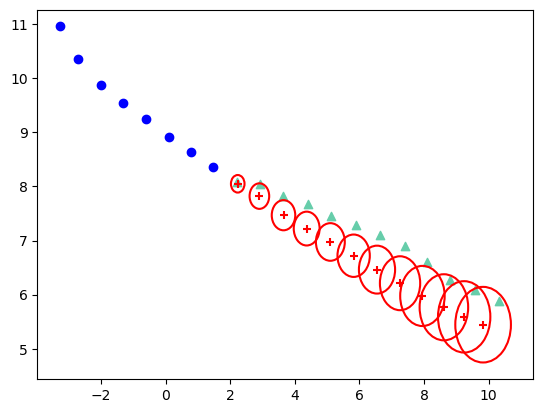

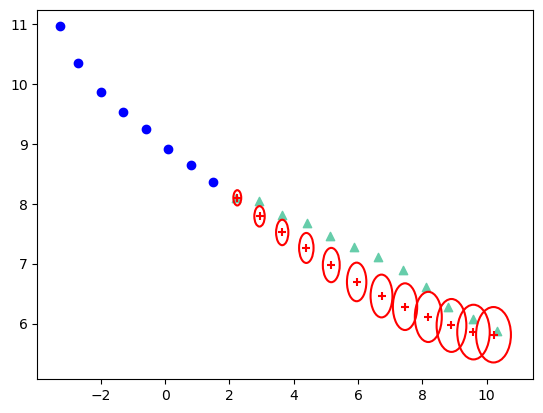

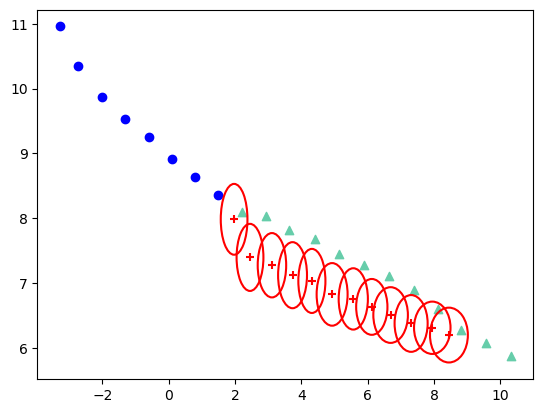

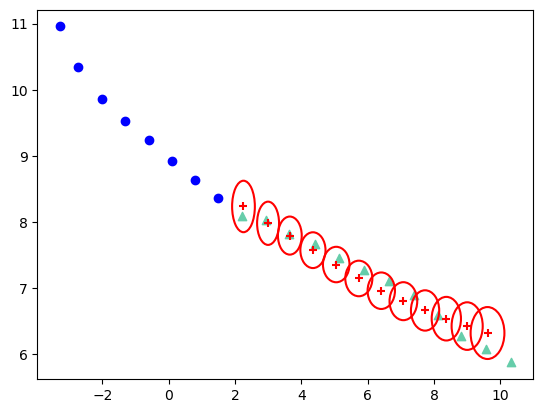

In [18]:
index = 258#np.random.randint(testdata_eth["y"].shape[0]) # 12, 455 ,217, 258 ,56
p=0.5
analyze.plot_results(testdata_eth,result_evidential_eth,p,index)
plt.savefig(path/"figures/ETH/series1_evidential") 
analyze.plot_results(testdata_eth,result_evidential_new_eth,p,index,tdist=True)
plt.savefig(path/"figures/ETH/series1_evidential_new") 
analyze.plot_results(testdata_eth,result_dropout_eth,p,index)
plt.savefig(path/"figures/ETH/series1_dropout") 
analyze.plot_results(testdata_eth,result_ensemble_eth,p,index)
plt.savefig(path/"figures/ETH/series1_ensemble") 

index is 677
index is 677
index is 677
index is 677


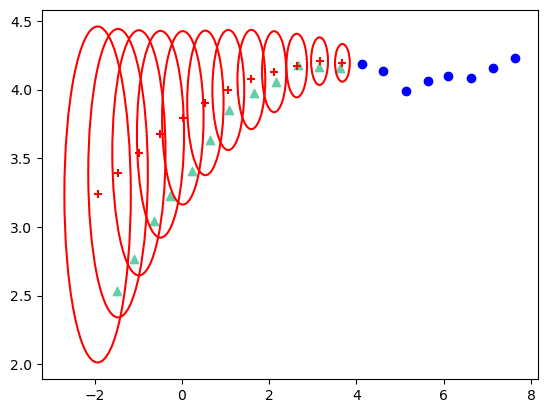

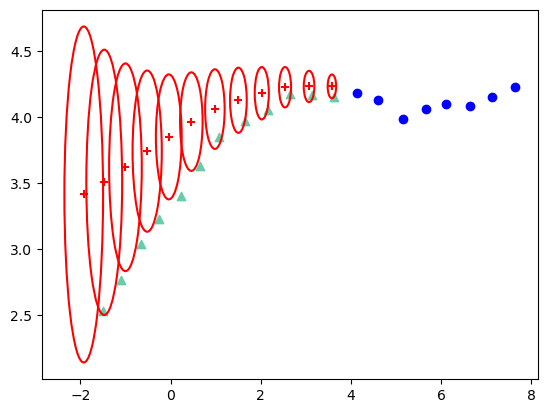

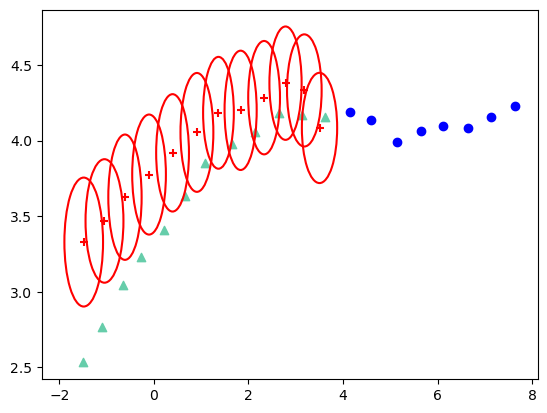

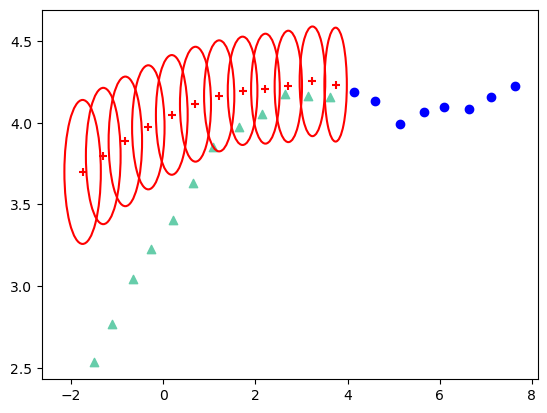

In [19]:
index = 677 #np.random.randint(testdata_eth["y"].shape[0]) # 12, 455 ,217, 258 ,56
p=0.5
analyze.plot_results(testdata_eth,result_evidential_eth,p,index)
plt.savefig(path/"figures/ETH/series2_evidential") 
analyze.plot_results(testdata_eth,result_evidential_new_eth,p,index)
plt.savefig(path/"figures/ETH/series2_evidential_new") 
analyze.plot_results(testdata_eth,result_dropout_eth,p,index)
plt.savefig(path/"figures/ETH/series2_dropout") 
analyze.plot_results(testdata_eth,result_ensemble_eth,p,index)
plt.savefig(path/"figures/ETH/series2_ensemble") 

index is 12
index is 12
index is 12
index is 12


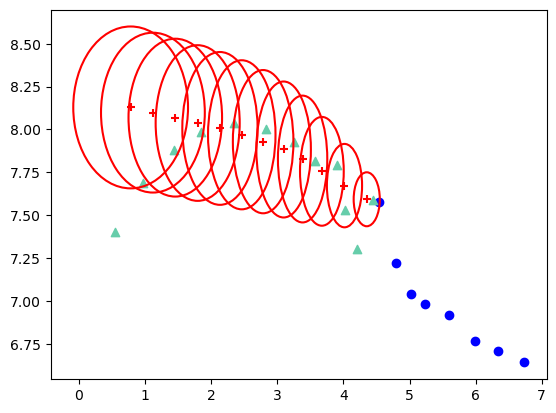

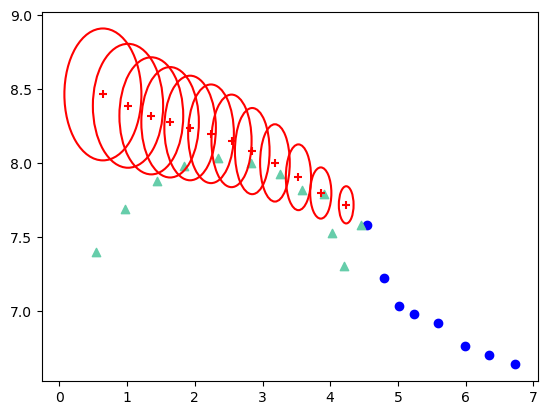

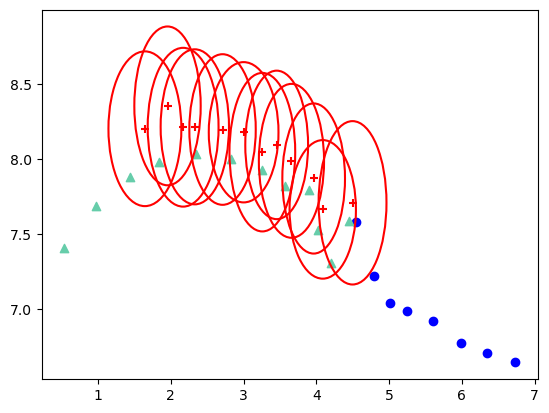

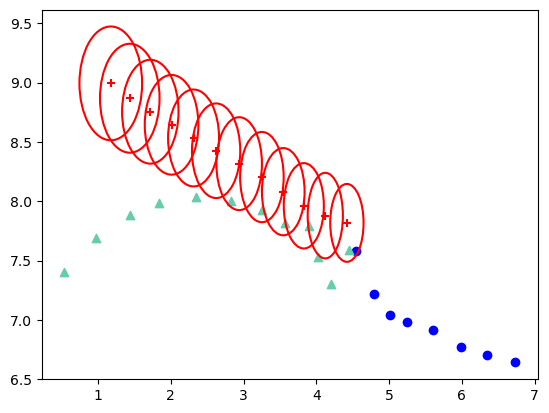

In [20]:
index = 12#np.random.randint(testdata_eth["y"].shape[0]) # 12, 455 ,217, 258 ,56
p=0.5
analyze.plot_results(testdata_eth,result_evidential_eth,p,index)
plt.savefig(path/"figures/ETH/series3_evidential") 
analyze.plot_results(testdata_eth,result_evidential_new_eth,p,index)
plt.savefig(path/"figures/ETH/series3_evidential_new") 
analyze.plot_results(testdata_eth,result_dropout_eth,p,index)
plt.savefig(path/"figures/ETH/series3_dropout") 
analyze.plot_results(testdata_eth,result_ensemble_eth,p,index)
plt.savefig(path/"figures/ETH/series3_ensemble") 

index is 447
index is 447
2.0250175440232265
2.0197802038293897
2.019399173450924
2.0189897928078353
2.0188736875369124
2.0188347027298765
2.018786778496875
2.0187050622612244
2.01857662655527
2.018341303282432
2.017537709357205
2.016661540156394
index is 447
index is 447


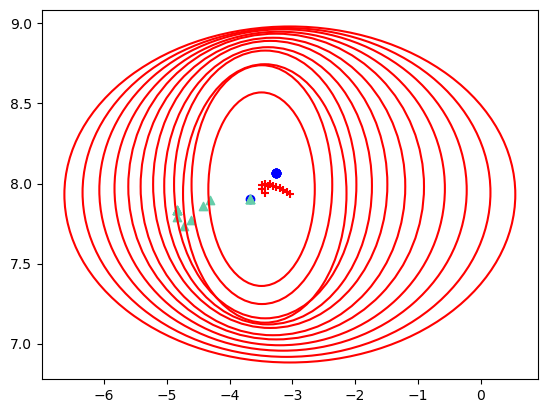

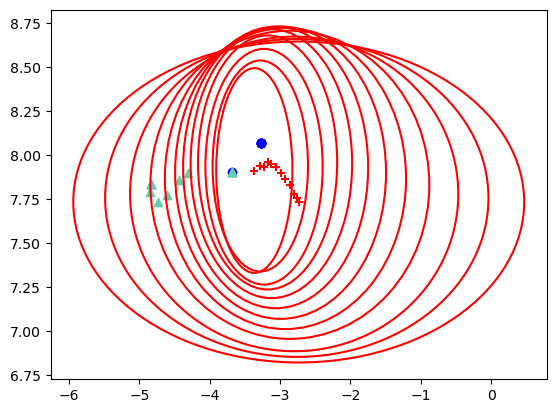

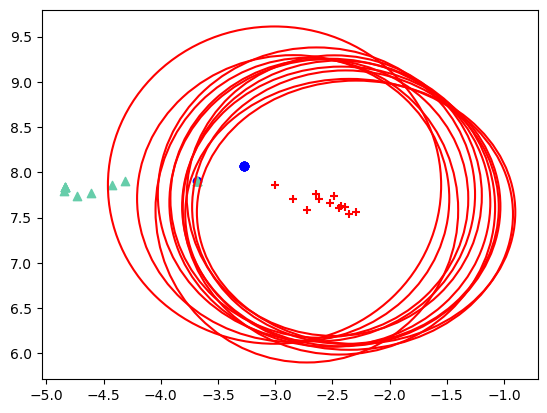

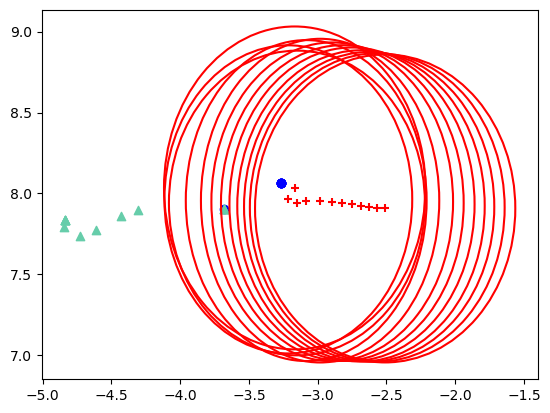

In [21]:
index = 447
p=0.95
analyze.plot_results(testdata_eth,result_evidential_eth,p,index)
plt.savefig(path/"figures/ETH/series4_evidential") 
analyze.plot_results(testdata_eth,result_evidential_new_eth,p,index,tdist=True)
plt.savefig(path/"figures/ETH/series4_evidential_new") 
analyze.plot_results(testdata_eth,result_dropout_eth,p,index)
plt.savefig(path/"figures/ETH/series4_dropout") 
analyze.plot_results(testdata_eth,result_ensemble_eth,p,index)
plt.savefig(path/"figures/ETH/series4_ensemble") 

# descriptive statistics

In [22]:
from data_preparation import clean_data

In [23]:
rawdata_eth=clean_data.load_raw_data(path/"data/ETH_data/seq_eth/obsmat.txt")
rawdata_hotel=clean_data.load_raw_data(path/"data/ETH_data/seq_hotel/obsmat.txt")
rawdata_zara01=clean_data.load_raw_data(path/"data/UCY_data/zara01/obsmat.txt")
rawdata_zara02=clean_data.load_raw_data(path/"data/UCY_data/zara02/obsmat.txt")

In [24]:
def create_descriptive(
    rawdata_eth,data_eth,testdata_eth, rawdata_hotel, data_hotel, testdata_hotel, rawdata_zara01,data_zara01, testdata_zara01, rawdata_zara02, data_zara02, testdata_zara02
):
    row_names = [
        "ETH",
        "HOTEL",
        "ZARA01",
        "ZARA02",
    ]
    col_names = ["Num. series", "Avg. timesteps", "N series train","N series test","Avg. dist train","avg dist test","min dist train", "min dist test"]
    table_descriptive = pd.DataFrame(
        [
            create_row_descriptive(rawdata_eth, data_eth,testdata_eth),
            create_row_descriptive(rawdata_hotel, data_hotel, testdata_hotel),
            create_row_descriptive(rawdata_zara01,data_zara01, testdata_zara01),
            create_row_descriptive(rawdata_zara02, data_zara02, testdata_zara02),
        ],
        columns=col_names,
        index=row_names,
    )
    return table_descriptive
    
def create_row_descriptive(rawdata, data,testdata):
    row = [ 
        rawdata['pedestrian_ID'].nunique(),
        rawdata.groupby("pedestrian_ID").count().mean().iloc[0],
        data["x"].shape[0],
        testdata["x"].shape[0],
        np.mean(np.sqrt(np.sum((data["x"][:,0,:]-data["y"][:,-1,:])**2,axis=1))),
        np.mean(np.sqrt(np.sum((testdata["x"][:,0,:]-testdata["y"][:,-1,:])**2,axis=1))),
        np.min(np.sqrt(np.sum((data["x"][:,0,:]-data["y"][:,-1,:])**2,axis=1))),
        np.min(np.sqrt(np.sum((testdata["x"][:,0,:]-testdata["y"][:,-1,:])**2,axis=1))),
    ]
    return row


In [25]:
create_descriptive(rawdata_eth,data_eth,testdata_eth, rawdata_hotel, data_hotel, testdata_hotel, rawdata_zara01,data_zara01, testdata_zara01, rawdata_zara02, data_zara02, testdata_zara02
)

,Num. series,Avg. timesteps,N series train,N series test,Avg. dist train,avg dist test,min dist train,min dist test
ETH,360,24.744444,1809,805,9.257163,8.310088,0.053693,0.000000
HOTEL,390,16.779487,789,408,3.412453,2.936362,0.000000,0.000000
ZARA01,148,33.945946,1413,821,8.161706,5.996794,0.600472,0.029186
ZARA02,204,46.750000,3945,1796,4.056178,3.866029,0.002631,0.009567


index is 1695
index is 1680
index is 98


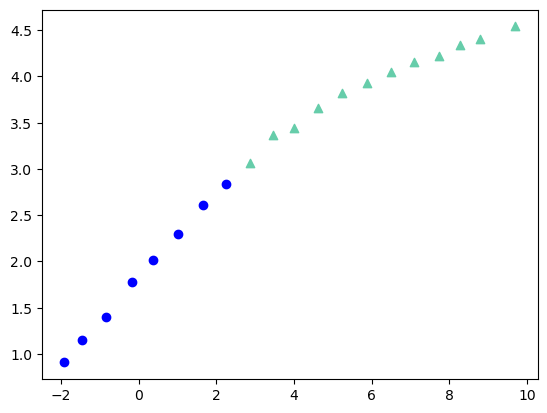

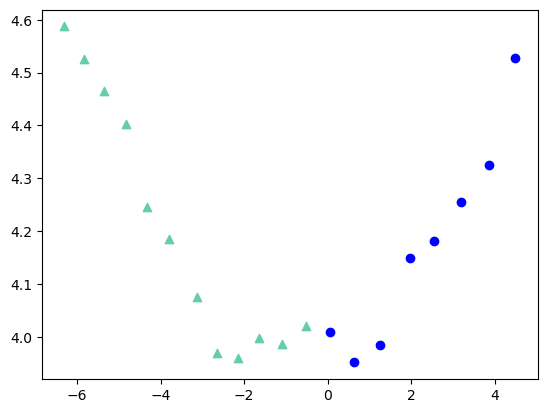

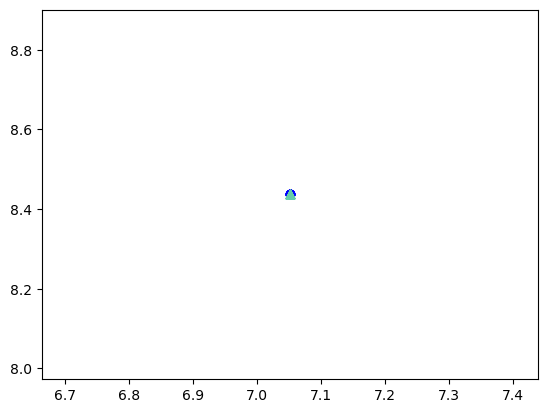

In [26]:
analyze.plot_data(data_eth,index=1695)
plt.savefig(path/"figures/Data/series1") 
analyze.plot_data(data_eth,index=1680)
plt.savefig(path/"figures/Data/series2") 
analyze.plot_data(testdata_eth,index=98)
plt.savefig(path/"figures/Data/series3") 

# Regression

In [9]:
data_reg, testdata_reg, result_evidential_reg, result_evidential_new_reg, result_dropout_reg, result_ensemble_reg= analyze.load_data(path/"results/Experiment_17_regression/")

In [10]:
analyze.create_table_regresssion(testdata_reg,result_evidential_reg, result_evidential_new_reg, result_dropout_reg, result_ensemble_reg).round(3)

,MSE,Training time (s),Prediction time (s),k=0.5,k=0.95,k>0.95
Evidential Network,2.169,,,0.852,1.000,1.000
Adapted Evidential Network,2.283,,,0.655,0.990,1.000
MC Dropout,2.370,,,0.278,0.650,0.862
Deep Ensemble,2.214,,,0.238,0.565,0.842


# Figures

In [11]:
from scipy import stats
def plot_regression(testdata, result,p,tdist=False):
    plt.figure()
    if tdist:
        t=np.array(sorted(zip(testdata_reg["x"],testdata_reg["y"], result[0].transpose()[0],result[1].transpose()[0],result[2][:,0] )))
        k = stats.t.ppf([1 - ((1 - p) / 2)],t[:,4], 0, 1)
    else:
        t=np.array(sorted(zip(testdata_reg["x"],testdata_reg["y"], result[0].transpose()[0],result[1].transpose()[0] )))
        k = stats.norm.ppf([1 - ((1 - p) / 2)], 0, 1)
    plt.scatter(t[:,0],t[:,1])
    plt.plot(t[:,0],t[:,2],color="orange")
    plt.plot(t[:,0],t[:,2]+k*np.sqrt(t[:,3]),color="orange")
    plt.plot(t[:,0],t[:,2]-k*np.sqrt(t[:,3]),color="orange")


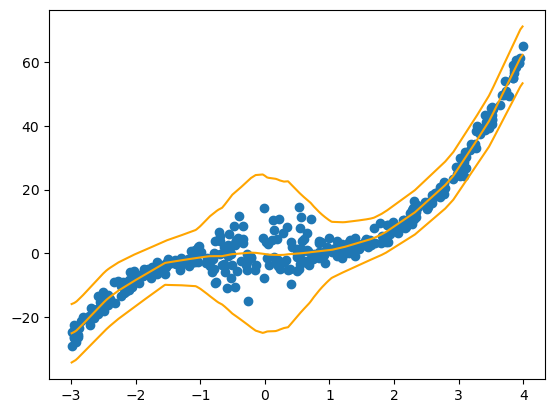

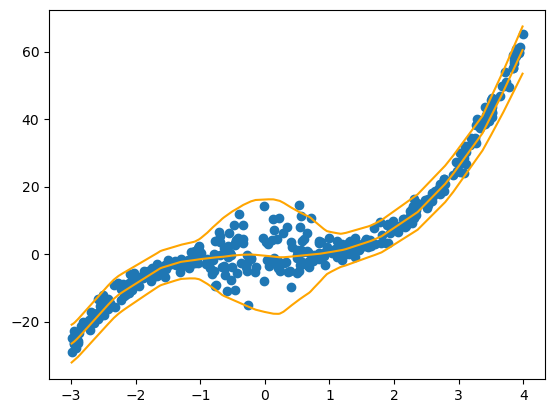

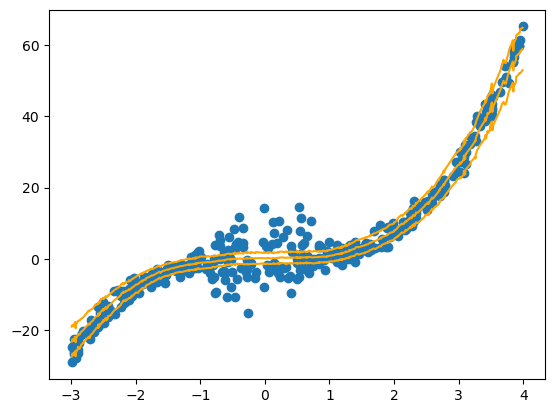

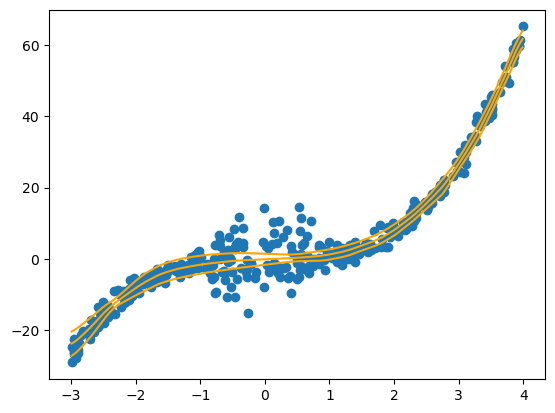

In [12]:
p = 0.95
plot_regression(testdata_reg, result_evidential_reg, p)
#plt.savefig(path/"figures/Regression/evidential") 
plot_regression(testdata_reg, result_evidential_new_reg, p, tdist=True)
#plt.savefig(path/"figures/Regression/evidential_new") 
plot_regression(testdata_reg, result_dropout_reg, p)
#plt.savefig(path/"figures/Regression/dropout") 
plot_regression(testdata_reg, result_ensemble_reg, p)
#plt.savefig(path/"figures/Regression/ensemble") 

# Descriptive

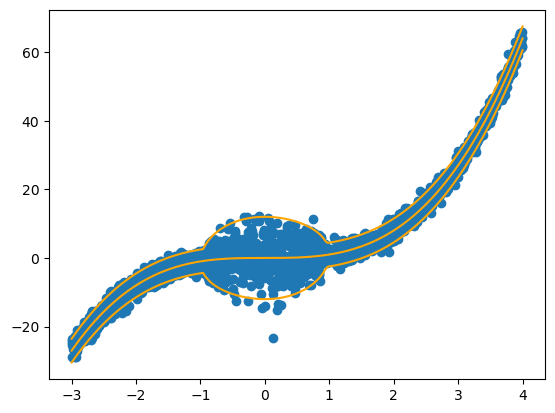

In [31]:
plt.scatter(data_reg["x"],data_reg["y"])
x_visualize= np.linspace(-3,4,200)
plt.plot(x_visualize,x_visualize**3-2*np.sqrt(np.maximum(np.ones(200) * 3, 36 - 36 * (x_visualize**2))),color="orange")
plt.plot(x_visualize,x_visualize**3,color="orange")
plt.plot(x_visualize,x_visualize**3+2*np.sqrt(np.maximum(np.ones(200) * 3, 36 - 36 * (x_visualize**2))),color="orange")
plt.savefig(path/"figures/Data/regression") 